This dataset is meant for regression tasks. It’s clean, structured, and perfect for beginners before tackling more complex ones. Thats why i used it

In [1]:
from sklearn.datasets import fetch_california_housing

data = fetch_california_housing(as_frame=True)
df = data.frame
df.head() # This shows first 5 rows of data , we know data structure , samples values from this.


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [2]:
df.describe() # It give statistic of numaric columns (mean , max,min,std etc)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [4]:
df.shape

(20640, 9)

In [5]:
# target value identification to know output and input features
df.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'MedHouseVal'],
      dtype='object')

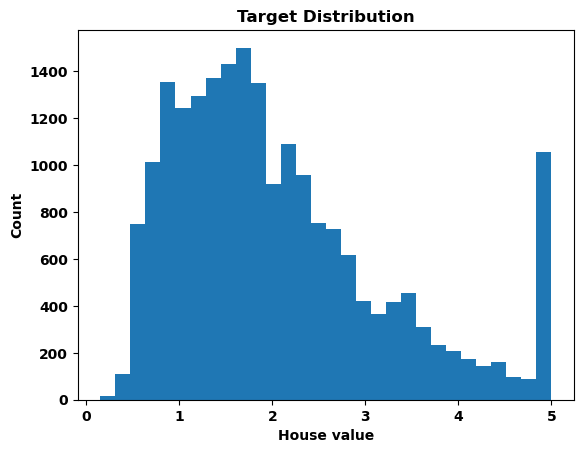

In [6]:
# Checking output spread

import matplotlib.pyplot as plt

plt.hist(df["MedHouseVal"],bins=30) # bins means divided data into chunks
plt.xlabel("House value")
plt.ylabel("Count")
plt.title("Target Distribution")
plt.show()

In [7]:
# checking missing values
df.isnull().sum()

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

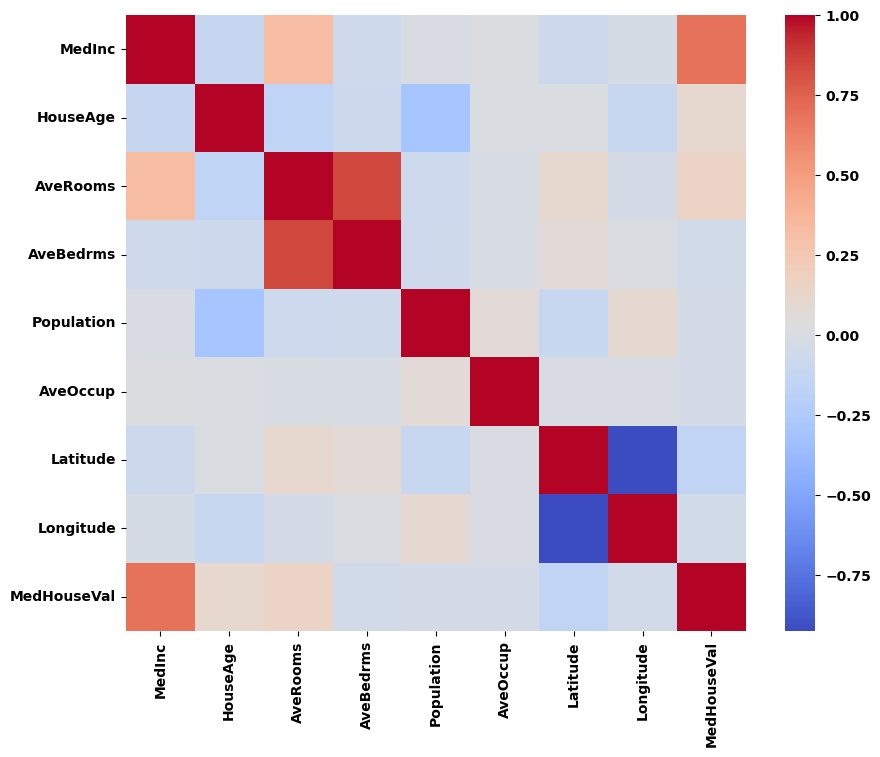

In [8]:
# correlation check (to get idea of  multicollinearity )

import seaborn as sns

plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),cmap="coolwarm")
plt.show()


In [9]:
# separate x (input features), y(target)

X = df.drop("MedHouseVal", axis=1)
y = df["MedHouseVal"]

In [10]:
# train test split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,y,test_size=0.2, random_state=42
)

In [11]:
# linear regression
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)

y_pred = lr.predict(X_test)

Evaluation

In [12]:
from sklearn.metrics import mean_squared_error, r2_score

In [13]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test ,y_pred)

print("MSE", mse)
print("R2 Score:", r2)

MSE 0.5558915986952441
R2 Score: 0.575787706032451


In [14]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(
    n_estimators=100,
    random_state=42
)

rf.fit(X_train,y_train)
rf_pred = rf.predict(X_test)

RF-evaluation

In [15]:
rf_mse = mean_squared_error(y_test, rf_pred)
rf_r2 = r2_score(y_test ,rf_pred)

print("MSE", rf_mse)
print("R2 Score:", rf_r2)

MSE 0.2553684927247781
R2 Score: 0.8051230593157366


In [16]:
import pandas as pd 

importance = pd.Series(
    rf.feature_importances_,
    index=X.columns
).sort_values(ascending=False)

importance

MedInc        0.524871
AveOccup      0.138443
Latitude      0.088936
Longitude     0.088629
HouseAge      0.054593
AveRooms      0.044272
Population    0.030650
AveBedrms     0.029606
dtype: float64

Conclusion

Random Forest performed better than Linear regression as it captured non_linear patterns in housing data and achieved higher R2 score